In [4]:

#obróbka wstępna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# Załaduj dane z pliku CSV
data = pd.read_csv('facebook_ads_data.csv')

# Konwertuj kolumnę 'ad_date' na datetime
## nie stosuję wskazówki
data['ad_date'] = pd.to_datetime(data['ad_date'])
# Ustaw styl wykresów
sns.set(style="whitegrid")

#wyłącz ostrzeżenia
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#sns.set(style="darkgrid") słabe ale może być
#sns.set(style="white") bardzo słabe 
#white, dark, whitegrid, darkgrid, ticks

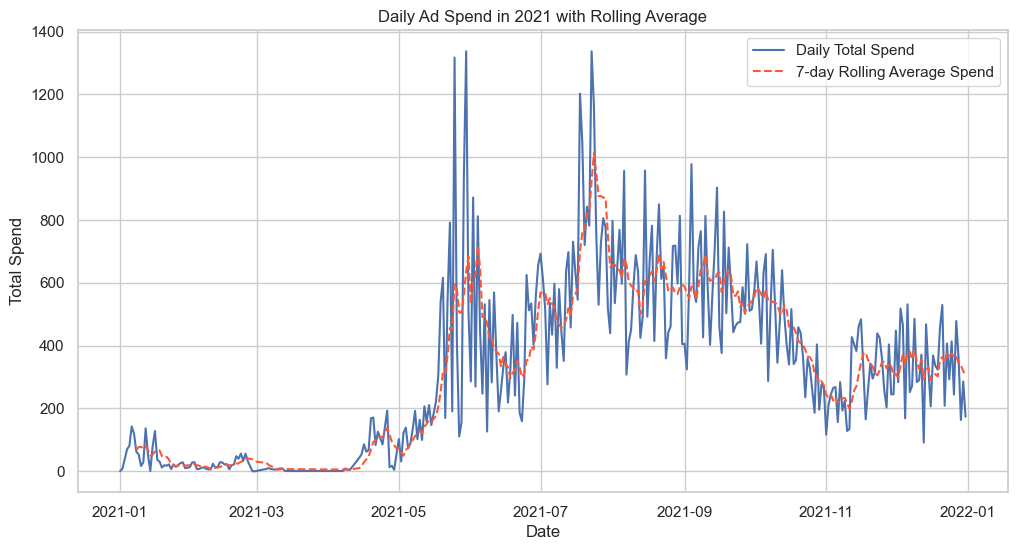

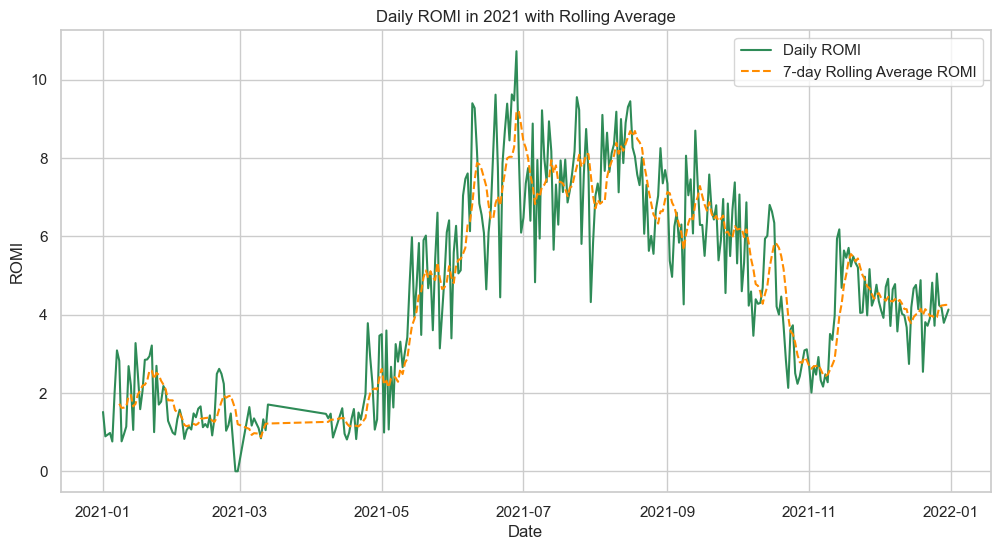

In [6]:
# 1. Pogrupuj dane według dnia.
daily_data = data.groupby('ad_date').sum()
#2. Dla pogrupowanych danych utwórz dwa wykresy:
    #a wykres z dziennymi wydatkami na reklamę w 2021 roku,
    #b wykres z dziennym ROMI w 2021 roku.
    # WSKAZÓWKA
    # Możesz porównywać i filtrować daty nawet bez konwertowania wartości pól. Na przykład, spróbuj porównać wartość "ad_date" z tekstem '2022-01-01’.
    ##nie mam pojęcia co autor wskazówki miał na myśli, skonwertowałem na datę
    # PUNKT BONUSOWY
    # Użyj metody rolling(), aby wyświetlić ruchomą średnią kosztów i ROMI.


# Filtracja danych z 2021 roku
daily_2021 = daily_data[daily_data.index.year == 2021].copy()
#czemu .copy()
#jak nie dam  copy to dostaję ostrzeżenie ale działa
# See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#   daily_2021['rolling_spend'] = daily_2021['total_spend'].rolling(window=7).mean()
# C:\Users\p.czubaszek\AppData\Local\Temp\ipykernel_6616\3419281618.py:16: SettingWithCopyWarning: 
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead



# Ruchoma średnia dla wydatków i ROMI
daily_2021['rolling_spend'] = daily_2021['total_spend'].rolling(window=7).mean()
daily_2021['rolling_romi'] = daily_2021['romi'].rolling(window=7).mean()

# Wykres dziennych wydatków na reklamę w 2021 roku z ruchomą średnią
plt.figure(figsize=(12, 6))
plt.plot(daily_2021.index, daily_2021['total_spend'], label='Daily Total Spend')
plt.plot(daily_2021.index, daily_2021['rolling_spend'], label='7-day Rolling Average Spend', color="#FF5733", linestyle='--')
##plt.plot(daily_2021.index, daily_2021['rolling_spend'], label='7-day Rolling Average Spend', color='orange', linestyle='--')
plt.title('Daily Ad Spend in 2021 with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Spend')
plt.legend()
plt.show()

# Wykres dziennego ROMI w 2021 roku z ruchomą średnią
plt.figure(figsize=(12, 6))
plt.plot(daily_2021.index, daily_2021['romi'], label='Daily ROMI', color='seagreen')
plt.plot(daily_2021.index, daily_2021['rolling_romi'], label='7-day Rolling Average ROMI', color='darkorange', linestyle='--')
plt.title('Daily ROMI in 2021 with Rolling Average')
plt.xlabel('Date')
plt.ylabel('ROMI')
plt.legend()
plt.show()



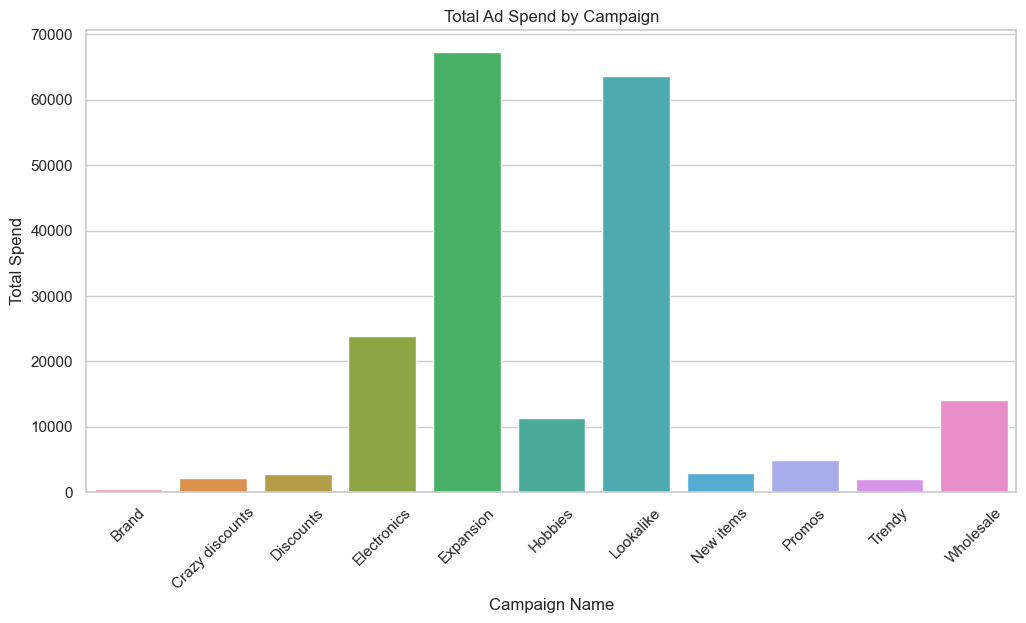

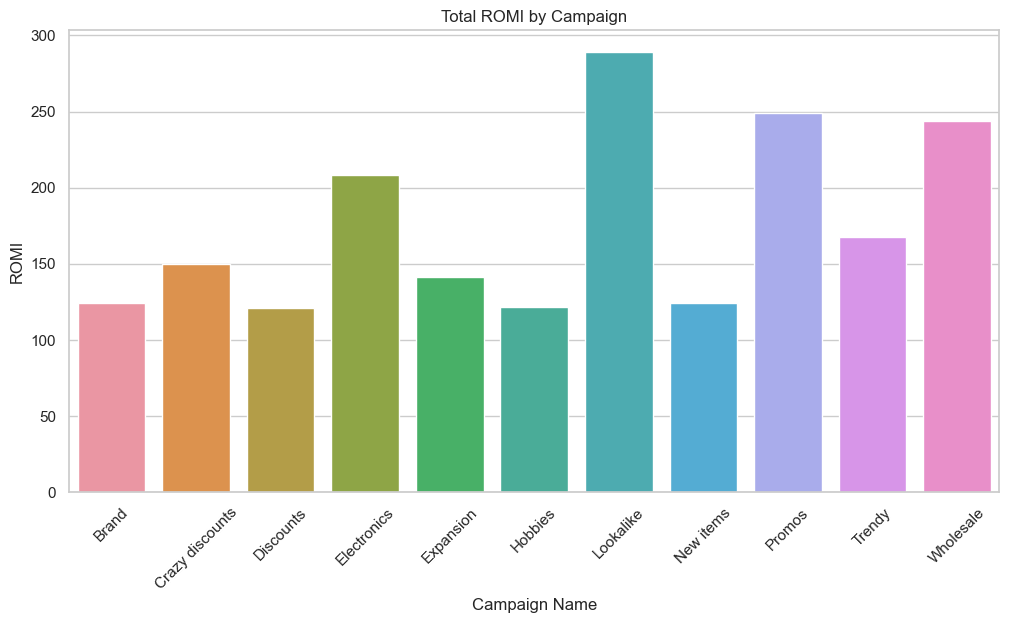

In [7]:
#część druga
#1. Pogrupuj dane według nazwy kampanii i utwórz dwa wykresy:
# wykres całkowitych wydatków na reklamę w każdej z kampanii,
# całkowity ROMI w każdej z kampanii.

# Pogrupowanie danych według nazwy kampanii
#campaign_data = data.groupby('campaign_name').sum() - nie można sumować wartości kolumn datetime64
##pd.set_option('mode.use_inf_as_na', True)
# Wykluczenie kolumny 'ad_date' i pogrupowanie danych według nazwy kampanii
campaign_data = data.drop(columns=['ad_date']).groupby('campaign_name').sum()

#Replacing inf and -inf
#df = df.replace([np.inf, -np.inf], np.nan)

# Konwersja inf na NaN - komentarz poniżej
campaign_data = campaign_data.replace([np.inf, -np.inf], np.nan) 
campaign_data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

## poddaje się ani jedno ani drugie nie likwiduje ostrzeżenia

# Wykres całkowitych wydatków na reklamę w każdej kampanii
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_data.index, y=campaign_data['total_spend'])
plt.title('Total Ad Spend by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('Total Spend')
plt.xticks(rotation=45) ## pochylenie etykiety osi x
plt.show()

# Wykres całkowitego ROMI w każdej kampanii
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_data.index, y=campaign_data['romi'])
plt.title('Total ROMI by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.xticks(rotation=45) ## pochylenie etykiety osi x
plt.show()

## zagadka jak wyrównać wykresy do prawej, przez różnej długości etykiety osi y kategorie nie są w linii 

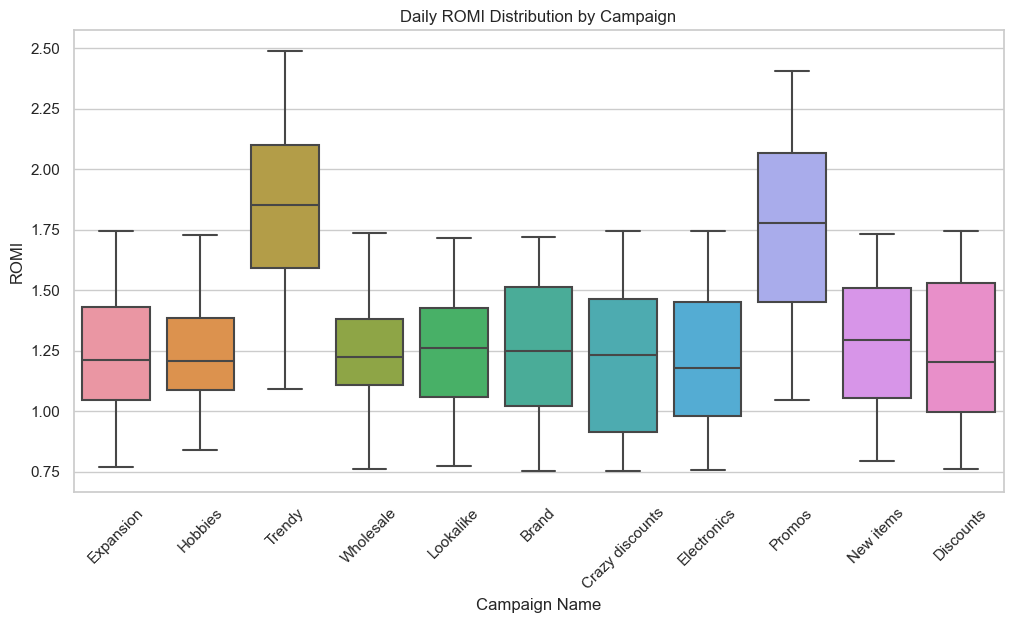

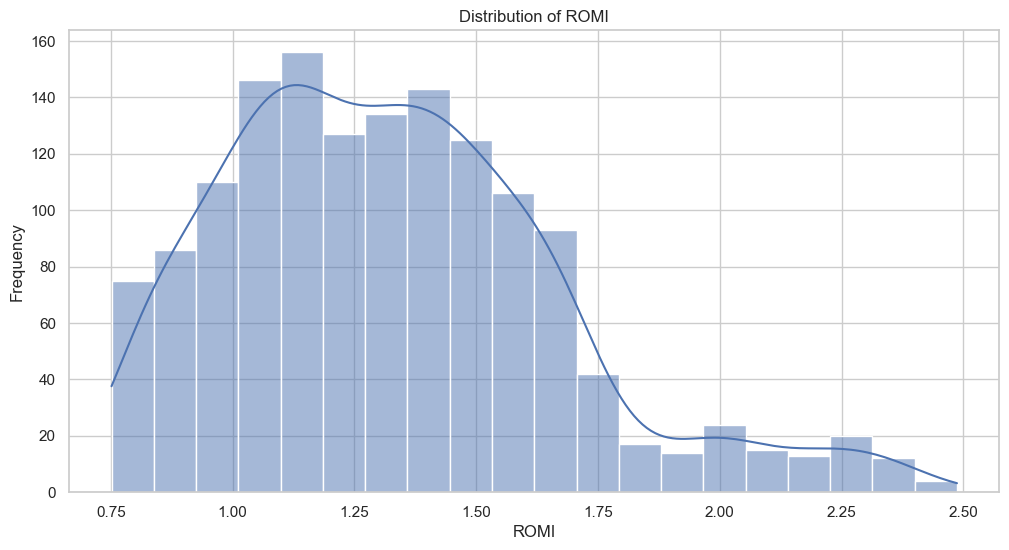

In [4]:
#2. Za pomocą box plot określ dzienny rozkład wskaźnika ROMI w każdej kampanii (według nazwy kampanii).
# Box plot dla dziennego rozkładu ROMI w każdej kampanii

data = data.replace([np.inf, -np.inf], np.nan) 
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)
## nie pomaga

plt.figure(figsize=(12, 6))
sns.boxplot(x='campaign_name', y='romi', data=data)
plt.title('Daily ROMI Distribution by Campaign')
plt.xlabel('Campaign Name')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.show()

#3. Utwórz histogram z rozkładem wartości ROMI w tabeli facebook_ads_data.csv
# Histogram z rozkładem wartości ROMI
plt.figure(figsize=(12, 6))
sns.histplot(data['romi'], bins=20, kde=True)
plt.title('Distribution of ROMI')
plt.xlabel('ROMI')
plt.ylabel('Frequency')
plt.show()

# dopiero tutaj mi sie posypało
# C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 
# Convert inf values to NaN before operating instead.
#   with pd.option_context('mode.use_inf_as_na', True):


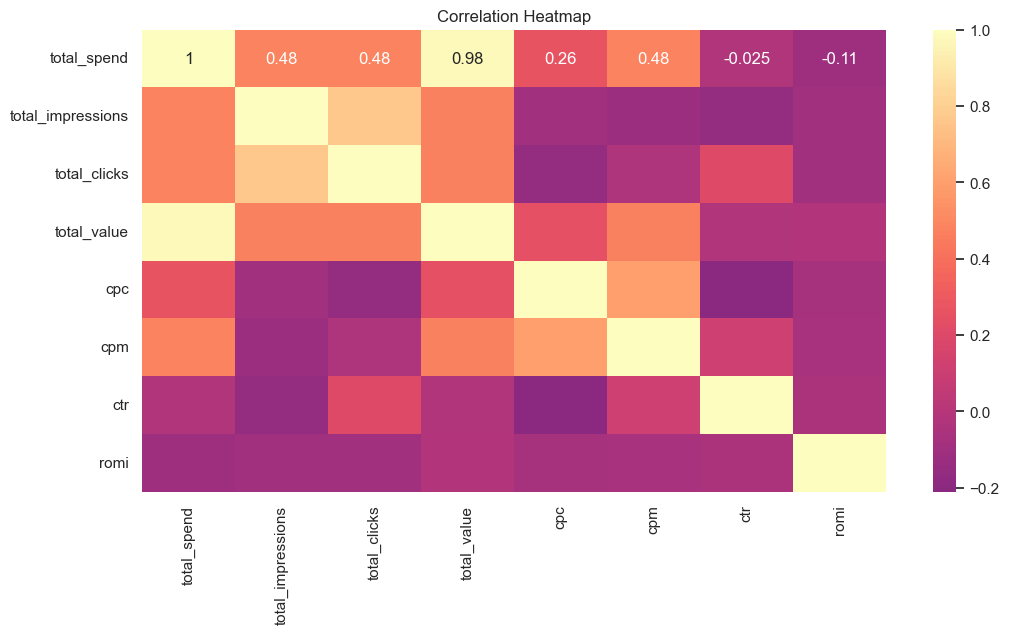

Najwyższa korelacja: total_value  total_spend    0.97889
dtype: float64
Najniższa korelacja: ctr  cpc   -0.210719
dtype: float64
Korelacja 'total_value': total_spend          0.978890
total_clicks         0.472124
total_impressions    0.472037
cpm                  0.471338
cpc                  0.250851
romi                -0.013733
ctr                 -0.022267
Name: total_value, dtype: float64


<Figure size 1200x600 with 0 Axes>

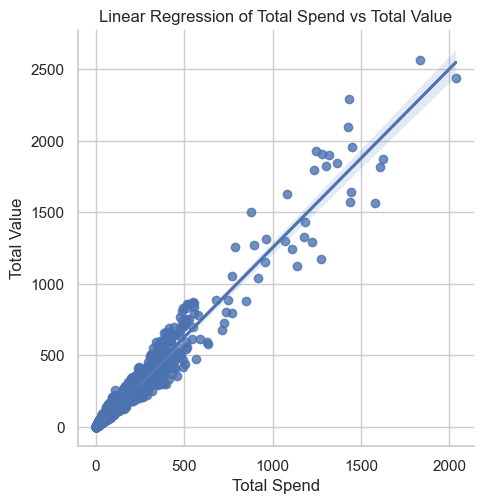

In [15]:
#4. Wykreśl mapę cieplną korelacji między wszystkimi wartościami liczbowymi w tabeli facebook_ads_data.csv. 
#Które wartości mają najwyższą i najniższą korelację? Z czym koreluje wartość "total_value"?

# 4. Mapa cieplna korelacji między wszystkimi wartościami liczbowymi
numeric_data = data.select_dtypes(include=['float64', 'int64']).copy()

# Konwersja inf na NaN
numeric_data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

plt.figure(figsize=(12, 6))
correlation_matrix = numeric_data.corr()
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
sns.heatmap(correlation_matrix, annot=True, cmap='magma', center=0)
#sns.heatmap(correlation_matrix, annot=True, cmap='YlOrBr', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Najwyższa i najniższa korelacja
highest_corr = correlation_matrix.unstack().sort_values(ascending=False)
lowest_corr = correlation_matrix.unstack().sort_values()

print("Najwyższa korelacja:", highest_corr[highest_corr < 1].head(1))
print("Najniższa korelacja:", lowest_corr.head(1))

# Korelacja total_value
print("Korelacja 'total_value':", correlation_matrix['total_value'].sort_values(ascending=False)[1:])

#5 5. Stwórz wykres punktowy z regresją liniową (możesz użyć do tego funkcji lmplot()) na podstawie danych z "total_spend" i "total_value",
# aby zwizualizować związek między tymi zmiennymi.

# Wykres punktowy z regresją liniową
plt.figure(figsize=(12, 6))
sns.lmplot(x='total_spend', y='total_value', data=numeric_data)
plt.title('Linear Regression of Total Spend vs Total Value')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.show()


In [14]:
#nazwy kolorów

# import math

# import matplotlib.pyplot as plt

# import matplotlib.colors as mcolors
# from matplotlib.patches import Rectangle


# def plot_colortable(colors, *, ncols=4, sort_colors=True):

#     cell_width = 212
#     cell_height = 22
#     swatch_width = 48
#     margin = 12

#     # Sort colors by hue, saturation, value and name.
#     if sort_colors is True:
#         names = sorted(
#             colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
#     else:
#         names = list(colors)

#     n = len(names)
#     nrows = math.ceil(n / ncols)

#     width = cell_width * ncols + 2 * margin
#     height = cell_height * nrows + 2 * margin
#     dpi = 72

#     fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
#     fig.subplots_adjust(margin/width, margin/height,
#                         (width-margin)/width, (height-margin)/height)
#     ax.set_xlim(0, cell_width * ncols)
#     ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
#     ax.yaxis.set_visible(False)
#     ax.xaxis.set_visible(False)
#     ax.set_axis_off()

#     for i, name in enumerate(names):
#         row = i % nrows
#         col = i // nrows
#         y = row * cell_height

#         swatch_start_x = cell_width * col
#         text_pos_x = cell_width * col + swatch_width + 7

#         ax.text(text_pos_x, y, name, fontsize=14,
#                 horizontalalignment='left',
#                 verticalalignment='center')

#         ax.add_patch(
#             Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
#                       height=18, facecolor=colors[name], edgecolor='0.7')
#         )

#     return fig
# plot_colortable(mcolors.CSS4_COLORS)
# plt.show()